## 모델의 성능 개선하기
* IBM sample datasets
https://www.kaggle.com/blastchar/telco-customer-churn

* Demographic info: 
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed: 
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## 데이터 로드하기
* 전처리된 모델을 로드하기

In [19]:
# telco_feature 로드하기
df = pd.read_csv('data/telco_feature.csv')
df.shape

(7043, 50)

In [20]:
# customerID 를 인덱스로 설정하기
df = df.set_index("customerID")

In [21]:
# head 로 미리보기

df.head()

,Churn_bool,Dependents_bool,PhoneService_bool,gender_bool,Partner_bool,PaperlessBilling_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),...,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,False,False,False,False,True,True,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
5575-GNVDE,False,False,True,True,False,False,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3668-QPYBK,True,False,True,True,False,True,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
7795-CFOCW,False,False,False,True,False,False,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
9237-HQITU,True,False,True,False,False,True,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [22]:
# info 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Churn_bool                               7043 non-null   bool 
 1   Dependents_bool                          7043 non-null   bool 
 2   PhoneService_bool                        7043 non-null   bool 
 3   gender_bool                              7043 non-null   bool 
 4   Partner_bool                             7043 non-null   bool 
 5   PaperlessBilling_bool                    7043 non-null   bool 
 6   DeviceProtection_No                      7043 non-null   int64
 7   DeviceProtection_No internet service     7043 non-null   int64
 8   DeviceProtection_Yes                     7043 non-null   int64
 9   PaymentMethod_Bank transfer (automatic)  7043 non-null   int64
 10  PaymentMethod_Credit card (automatic)    7043 non-null   int64

## 전처리

In [23]:
# df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [24]:
# 결측치를 채워주는 방법도 있지만 일단 제거하도록 합니다.



In [25]:
# Churn 빈도수 보기

df['Churn_bool'].value_counts()

False    5174
True     1869
Name: Churn_bool, dtype: int64

## 학습, 예측 데이터셋 나누기
### 학습, 예측에 사용할 컬럼

In [26]:
df.nunique()

Churn_bool                                 2
Dependents_bool                            2
PhoneService_bool                          2
gender_bool                                2
Partner_bool                               2
PaperlessBilling_bool                      2
DeviceProtection_No                        2
DeviceProtection_No internet service       2
DeviceProtection_Yes                       2
PaymentMethod_Bank transfer (automatic)    2
PaymentMethod_Credit card (automatic)      2
PaymentMethod_Electronic check             2
PaymentMethod_Mailed check                 2
StreamingMovies_No                         2
StreamingMovies_No internet service        2
StreamingMovies_Yes                        2
monthlycharges_group_0-30                  2
monthlycharges_group_30-70                 2
monthlycharges_group_70-99                 2
monthlycharges_group_99plus                2
totalcharges_group_0-2k                    2
totalcharges_group_2k-4k                   2
totalcharg

In [27]:
# 피처로 사용할 컬럼 지정하기
# feature_names


### 정답값이자 예측해야 될 값

In [28]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Churn_bool"
label_name

'Churn_bool'

### 문제(feature)와 답안(label)을 나누기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

In [29]:
# X, y를 만들어 줍니다.

X = df.drop(label_name,axis=1)
y = df[label_name]

### 학습, 예측 데이터셋 만들기
* X_train : 학습 세트 만들기, 행렬, 판다스의 데이터프레임, 2차원 리스트(배열) 구조,  예) 시험의 기출문제
* y_train : 정답 값을 만들기, 벡터, 판다스의 시리즈, 1차원 리스트(배열) 구조, 예) 기출문제의 정답
* X_test : 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
* y_test : 예측의 정답값 예) 실전 시험 문제의 정답

In [30]:
# train_test_split 으로 데이터셋 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4718, 48), (2325, 48), (4718,), (2325,))

In [32]:
# X_train 미리보기

X_train

,Dependents_bool,PhoneService_bool,gender_bool,Partner_bool,PaperlessBilling_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
2985-JUUBZ,True,True,True,True,True,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5016-ETTFF,False,False,True,False,False,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1998-VHJHK,False,True,False,False,False,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1925-TIBLE,False,True,False,True,True,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
0485-ZBSLN,True,True,True,True,False,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0684-AOSIH,False,True,True,True,True,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
5982-PSMKW,True,True,False,True,True,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
8044-BGWPI,True,True,True,True,True,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [33]:
# X_test 미리보기

X_test

,Dependents_bool,PhoneService_bool,gender_bool,Partner_bool,PaperlessBilling_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
1024-GUALD,False,False,False,True,True,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
0484-JPBRU,False,True,True,False,True,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3620-EHIMZ,True,True,False,True,False,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6910-HADCM,False,True,False,False,False,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8587-XYZSF,False,True,True,False,False,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3836-FZSDJ,False,True,True,True,False,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1301-LOPVR,True,False,True,True,True,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7479-NITWS,False,True,True,False,True,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [34]:
# y_train 미리보기

y_train

customerID
2985-JUUBZ    False
5016-ETTFF     True
1998-VHJHK    False
1925-TIBLE     True
0485-ZBSLN    False
              ...  
0684-AOSIH     True
5982-PSMKW    False
8044-BGWPI    False
7450-NWRTR     True
4795-UXVCJ    False
Name: Churn_bool, Length: 4718, dtype: bool

## 머신러닝 모델로 예측하기

In [35]:
# 트리모델 로드하기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [37]:
# 학습하기

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
# 예측하기

y_pred = model.predict(X_test)

## 모델 평가하기

In [42]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([4.35777826e-02, 4.76986635e-03, 6.37273142e-02, 6.12477354e-02,
       4.32595949e-02, 2.24117813e-02, 8.27530951e-05, 1.94609282e-02,
       2.05013630e-02, 2.45033757e-02, 2.65442134e-02, 1.46640346e-02,
       1.11992004e-02, 0.00000000e+00, 2.85089608e-02, 4.04374491e-03,
       8.24251383e-03, 6.71950109e-03, 8.19201257e-03, 4.56714463e-03,
       9.40736182e-03, 1.12451442e-02, 7.07300996e-03, 3.24836289e-02,
       2.03546951e-04, 2.09651686e-02, 2.41431916e-02, 3.38332762e-03,
       1.89650069e-02, 1.81524454e-02, 0.00000000e+00, 2.18423633e-02,
       1.98132502e-02, 0.00000000e+00, 1.81739060e-02, 1.97232498e-01,
       1.66840154e-03, 4.13567033e-03, 4.24068668e-02, 7.39872223e-03,
       1.28279551e-02, 7.01757964e-03, 1.87248033e-05, 6.09513860e-02,
       6.80901940e-04, 2.69594193e-02, 8.02491572e-05, 1.65464528e-02])

In [43]:
feature_names = X_train.columns.tolist()
feature_names

['Dependents_bool',
 'PhoneService_bool',
 'gender_bool',
 'Partner_bool',
 'PaperlessBilling_bool',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'monthlycharges_group_0-30',
 'monthlycharges_group_30-70',
 'monthlycharges_group_70-99',
 'monthlycharges_group_99plus',
 'totalcharges_group_0-2k',
 'totalcharges_group_2k-4k',
 'totalcharges_group_4k-6k',
 'totalcharges_group_6kplus',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'Contract_Mont

In [45]:
df_importance = pd.DataFrame({'feature_names' : feature_names, 'importance' :model.feature_importances_})
df_importance = df_importance.sort_values('importance', ascending=False)

In [48]:
# 피처의 중요도 시각화 하기

plt.figure(figsize=(15,10))
sns.barplot(data = df.importance, x='importance', y = 'feature_names')

AttributeError: 'DataFrame' object has no attribute 'importance'

<Figure size 1080x720 with 0 Axes>

### 점수 측정하기
#### Accuracy

In [49]:
# accuracy

y_test == y_pred

customerID
1024-GUALD     True
0484-JPBRU     True
3620-EHIMZ     True
6910-HADCM    False
8587-XYZSF     True
              ...  
3836-FZSDJ     True
1301-LOPVR     True
7479-NITWS    False
3312-UUMZW     True
0060-FUALY     True
Name: Churn_bool, Length: 2325, dtype: bool

In [50]:
# 직접 계산해 보기
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7311827956989247

#### F1 score
* precision 과 recall의 조화평균
* [정밀도와 재현율 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8)

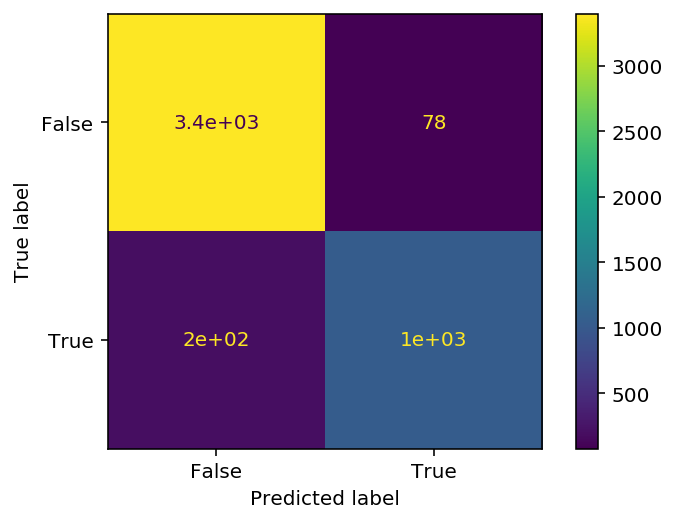

In [51]:
# plot_confusion_matrix 를 그립니다.
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, y_train)


In [52]:
# classification_report 를 출력합니다.
from sklearn.metrics import classification_report

x = classification_report(y_test, y_pred)
print(x)


              precision    recall  f1-score   support

       False       0.81      0.82      0.82      1697
        True       0.50      0.50      0.50       628

    accuracy                           0.73      2325
   macro avg       0.66      0.66      0.66      2325
weighted avg       0.73      0.73      0.73      2325

